In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as ptl
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('who.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Podemos observar que la Columna bmi tiene algunos valores nulos

In [5]:
#Funcion para determinar la cantidad de bmi que son nulos
pd.isnull(df['bmi']).sum()

201

In [6]:
#Estoy llenando las columnas con valor null con el promedio de valores de la columna
mediana_bmi = df['bmi'].mean()
df.bmi = df['bmi'].fillna(df['bmi'].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# La variable Id es un identificador unico el cual no es relevante para la prediccion del lable stroke
# Al hacer un len comprobamos que todos los id son diferentes e iguales a la cantidad de instancias que hay.
len(df['id'].unique())

5110

In [9]:
#Utilizamos la funcion de drop que nos ofrece la libreria pandas y con el atributo axis=1 para eliminar una columna
df = df.drop('id', axis=1)

In [10]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [11]:
# Analisasmos la cantidad de personas que tuvieron un stroke y las que no, en el dataset

df.stroke.value_counts()



0    4861
1     249
Name: stroke, dtype: int64

## Como podemos observar los datos no estan balanceados ya que existe una mayor cantidad de personas que no han sufrido un Stroke con respecto a las que si han tennido un stroke la diferencia es de 4612 instancias

### Cleaning Not Null Values

In [12]:
# Variable genero puede tener alguna informacion basura.
df['gender'].unique()   

array(['Male', 'Female', 'Other'], dtype=object)

# Cambiar lo datos de ever_married por valores numericos

In [13]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.ever_married = df.ever_married.apply(lambda x : 1 if x == 'Yes' else 0)

In [15]:
df.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

## Cambiar los datos de Residence_type por valores numericos

In [16]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [17]:
#Cambiamos los valores para cuando tengamos un tipo de residencia Urbana sea igual a 1 y cuando sea Rural sera 0
df.Residence_type = df.Residence_type.apply(lambda x : 1 if x == 'Urban' else 0)

In [18]:
df.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [19]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


## Cambiar el genero a valores numericos 

In [20]:
df.gender = df.gender.apply(lambda x : 1 if x == 'Male' else 0)

In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


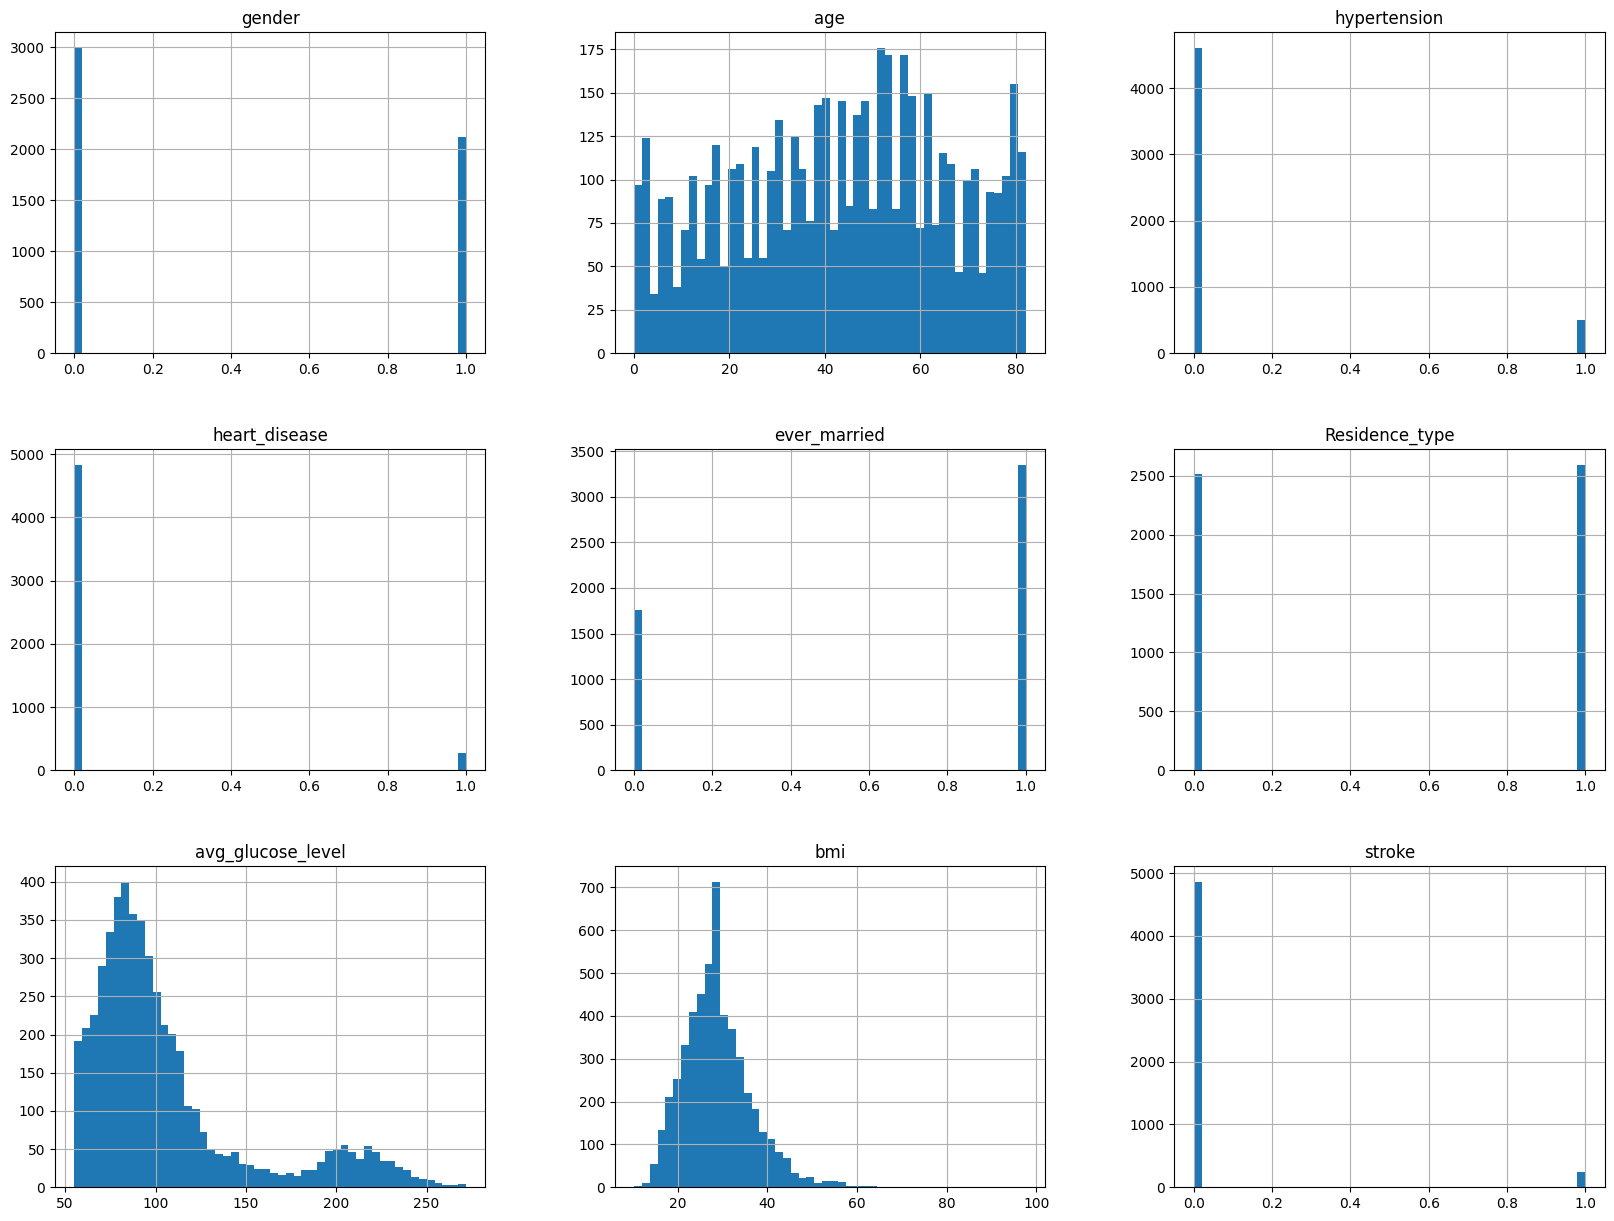

In [22]:
df.hist(bins=50, figsize=(20,15))
ptl.show()

## Creando Test set

In [23]:
train_set,test_set = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
test_set.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
0       0.08   0             0              0             children       1               139.67             14.1  Unknown          0         1
1       18.00  0             0              0             Private        1               97.39              22.8  never smoked     0         1
        15.00  0             0              0             Private        0               61.61              27.8  never smoked     0         1
                                                                                         144.15             24.1  never smoked     0         1
                                                          Self-employed  1               68.40              23.0  never smoked     0         1
                                                                                                                                            ..
0   

## Training set Copy

In [25]:
training_data = train_set.copy()

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

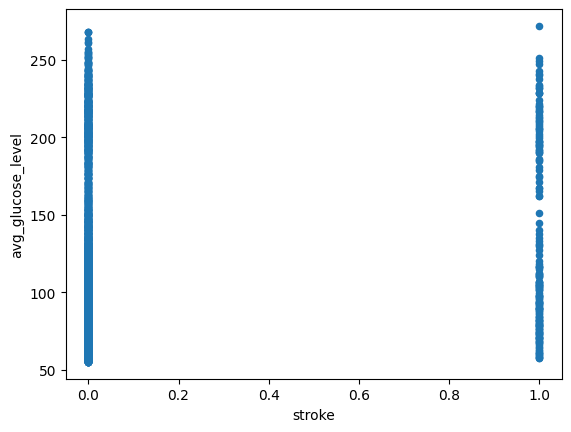

In [26]:
training_data.plot(kind="scatter",x = "stroke", y = "avg_glucose_level")

<AxesSubplot: ylabel='Frequency'>

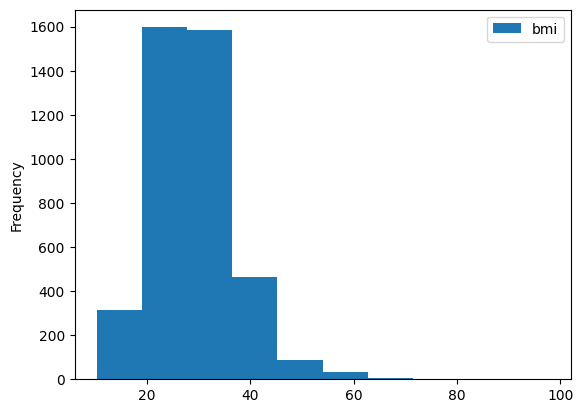

In [27]:
training_data.plot(kind="hist",x = "stroke", y = "bmi")

In [28]:
# Buscando correlaciones entre los atributos
corr_matrix = training_data.corr()

/tmp/ipykernel_14963/4205492362.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = training_data.corr()


In [29]:
corr_matrix["stroke"]

gender               0.006731
age                  0.237170
hypertension         0.118129
heart_disease        0.131467
ever_married         0.097386
Residence_type       0.014873
avg_glucose_level    0.122887
bmi                  0.038824
stroke               1.000000
Name: stroke, dtype: float64

array([[<AxesSubplot: xlabel='hypertension', ylabel='hypertension'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='hypertension'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='hypertension'>,
        <AxesSubplot: xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot: xlabel='stroke', ylabel='hypertension'>,
        <AxesSubplot: xlabel='age', ylabel='hypertension'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='avg_glucose_level', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='bmi', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='stroke', ylabel='heart_disease'>,
        <AxesSubplot: xlabel='age', ylabel='heart_disease'>],
       [<AxesSubplot: xlabel='hypertension', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='heart_disease', ylabel='avg_glucose_level'>,
        <AxesSubplot: xlabel='avg_glucose_level', y

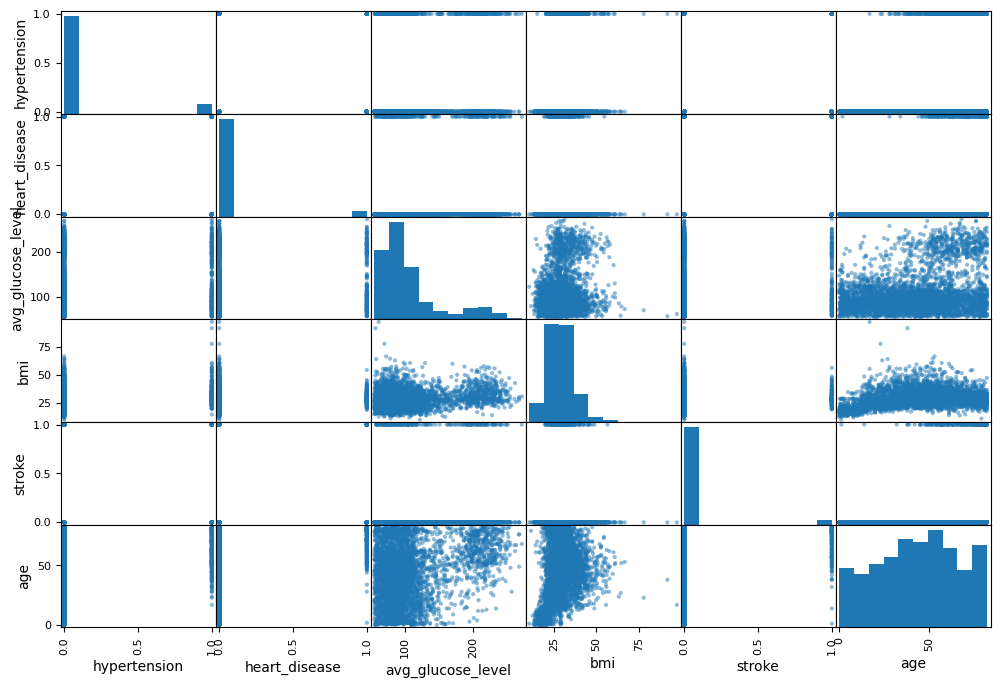

In [30]:
attributes = ["hypertension","heart_disease","avg_glucose_level","bmi","stroke","age"]

scatter_matrix(training_data[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='avg_glucose_level', ylabel='bmi'>

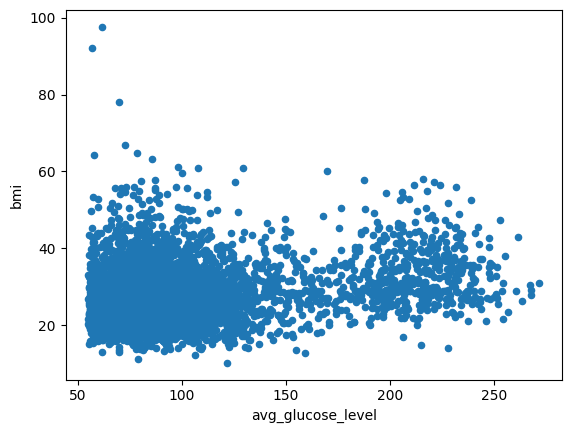

In [31]:
training_data.plot(kind="scatter", x="avg_glucose_level", y="bmi")

## Utilizo el algorimo Random forest para determinar cuales son los features de mayor importancia para el lable que querermos determinar

In [32]:
X = df.drop(['stroke'], axis = "columns")
y = df['stroke']

In [33]:
X.shape, y.shape 

((5110, 10), (5110,))

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

c_t = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
X = np.array(c_t.fit_transform(X))

#Ejemplo de Transformacion de columnas work_type,smoking_status de repositorio: https://github.com/AntonyBoza/MACHINE-LEARNING/blob/master/MODELO_PREDICCION_ACV_WHO.ipynb

<AxesSubplot: >

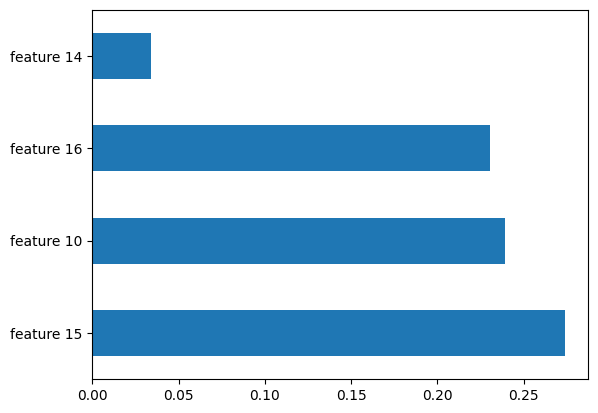

In [35]:
# Utilizamos un modelo de árboles aleatorios de decisión para obtener los valores de importancia relativa de cada atributo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#X=dataset.iloc[:,:-1]
#y=dataset.iloc[:,-1]
model.fit(X, y)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

(pd.Series(model.feature_importances_, index=feature_names)
   .nlargest(4)
   .plot(kind='barh')) 

# Codigo sacado de Repositorio para determinar cuales son los atributos de mayor importancia : https://github.com/AntonyBoza/MACHINE-LEARNING/blob/master/MODELO_PREDICCION_ACV_WHO.ipynb

In [36]:
# El shape en el axis 1 corresponde a las columnas del dataframe
X.shape[1]

17

# Los atributos mas importantes son: age, avg_glucose_level, bmi, Residence_type

In [37]:
print(feature_names)

['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 10', 'feature 11', 'feature 12', 'feature 13', 'feature 14', 'feature 15', 'feature 16']


In [38]:
data = pd.DataFrame(X, columns=feature_names)
data = data.drop(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9', 'feature 12', 'feature 13', 'feature 11'], axis='columns')
data.head()

,feature 10,feature 14,feature 15,feature 16
0,67.0,1.0,228.69,36.600000
1,61.0,0.0,202.21,28.893237
2,80.0,0.0,105.92,32.500000
3,49.0,1.0,171.23,34.400000
4,79.0,0.0,174.12,24.000000


In [39]:
data.shape

(5110, 4)

In [40]:
data.rename(columns = {'feature 10':'age', 'feature 14':'Residence_type',
                              'feature 15':'avg_glucose_level', 'feature 16':'bmi'}, inplace = True)

In [41]:
data['Residence_type']

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
5105    1.0
5106    1.0
5107    0.0
5108    0.0
5109    1.0
Name: Residence_type, Length: 5110, dtype: float64

In [42]:
X = data


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   Residence_type     5110 non-null   float64
 2   avg_glucose_level  5110 non-null   float64
 3   bmi                5110 non-null   float64
dtypes: float64(4)
memory usage: 159.8 KB


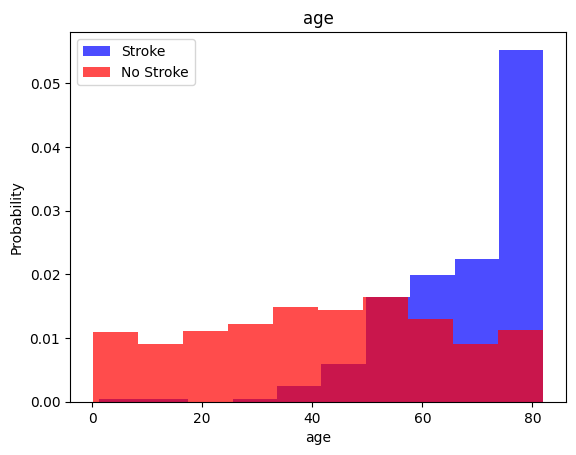

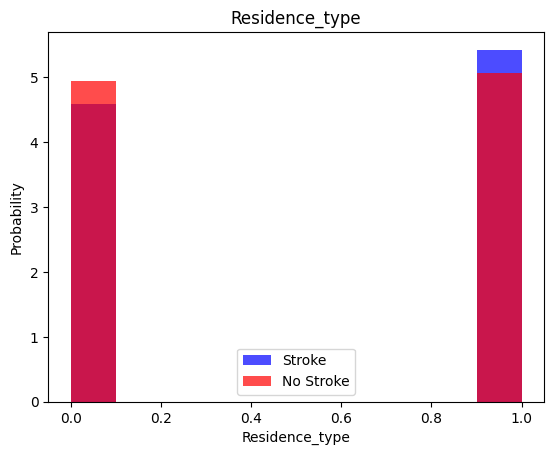

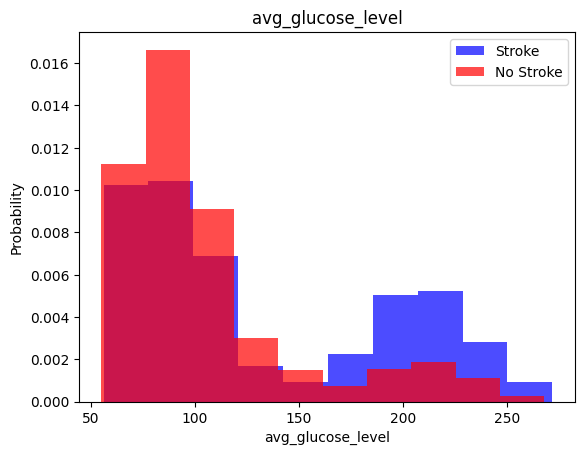

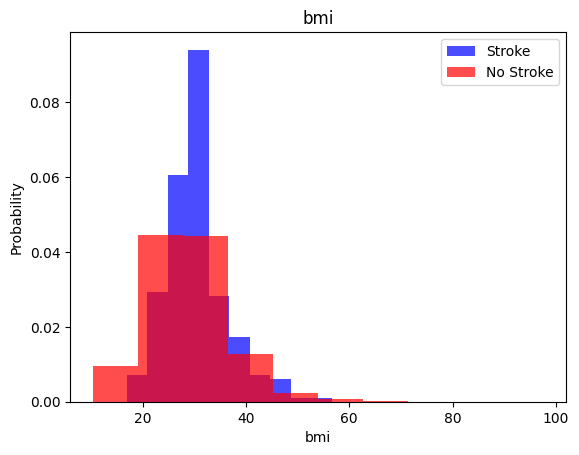

In [44]:
# Observamos la grafica de los features seleccionados en busqueda de una mayor relacion con Stroke
for feature in X.columns:
    ptl.hist(X[y == 1][feature], color = 'blue',label='Stroke', alpha = 0.7, density=True)
    ptl.hist(X[y == 0][feature], color = 'red',label='No Stroke',alpha = 0.7, density=True)
    ptl.title(feature)
    ptl.ylabel('Probability')
    ptl.xlabel(feature)
    ptl.legend()
    ptl.show()


## Balanceando los datos

In [45]:
# Existen muchos casos de no storke y muy pocos casos de stroke
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(X, y, oversample=False):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
        

    
    return X, y

In [50]:
# Convertir los datos 

X, y = scale_dataset(X,y,oversample=True)

In [52]:
y.value_counts(), y.shape, X.shape

(1    4861
 0    4861
 Name: stroke, dtype: int64,
 (9722,),
 (9722, 4))

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Mostramos una ista de tuplas con los tamanos de los set de entrenamiento y prueba
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7777, 4), (7777,), (1945, 4), (1945,))

## Entrenar el modelo 

### Modelo de Regresion Lineal 

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
lin_reg.score(X_test, y_test)

0.33496399611196237

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores)

In [63]:
#Codigo sacado de /02_end_to_end_machine_learning_project.ipynb

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_scores)

Scores: [0.41936296 0.39543829 0.39190395 0.401126   0.42816562 0.40251628
 0.42540363 0.40491373 0.39543161 0.41392196]
Mean: 0.4078184020388795
Standard deviation: 0.012389863093363436


### Modelo de Regresion logistica

In [60]:
from sklearn.linear_model import LogisticRegression

loc_reg = LogisticRegression()
loc_reg.fit(X_train,y_train)


LogisticRegression()

In [61]:
loc_reg.score(X_test, y_test)

0.7676092544987146

In [64]:
scores = cross_val_score(loc_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=4)
loc_reg_scores = np.sqrt(-scores)

In [65]:
display_scores(loc_reg_scores)

Scores: [0.48805022 0.47790696 0.49482923 0.46036307]
Mean: 0.48028737023485274
Standard deviation: 0.012984333225427823


### Modelo de Regresion de arbol

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_test, y_test)

DecisionTreeRegressor()

In [67]:
tree_reg.score(X_test, y_test)

1.0

In [72]:
scores = cross_val_score(tree_reg, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=50)
tree_reg_scores = np.sqrt(-scores)

display_scores(tree_reg_scores)

Scores: [0.39223227 0.39223227 0.32025631 0.32025631 0.2773501  0.2773501
 0.22645541 0.2773501  0.16012815 0.16012815 0.35805744 0.2773501
 0.16012815 0.16012815 0.42365927 0.39223227 0.22645541 0.32025631
 0.2773501  0.22645541 0.35805744 0.22645541 0.2773501  0.35805744
 0.22645541 0.22645541 0.22645541 0.2773501  0.2773501  0.22645541
 0.16012815 0.16012815 0.22645541 0.32025631 0.16012815 0.32025631
 0.22645541 0.2773501  0.22645541 0.         0.16012815 0.35805744
 0.2773501  0.16012815 0.2773501  0.32444284 0.28097574 0.28097574
 0.28097574 0.32444284]
Mean: 0.26217388446752465
Standard deviation: 0.07978764865634166
